In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Inspecting the datasets for cleaning

In [14]:
df1 = pd.read_csv("mexico-real-estate-1.csv")
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186.0,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82.0,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150.0,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,"$94,835.67"


In [15]:
df1.shape

(700, 6)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_usd      700 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.9+ KB


Cleaning the datasets(df1, df2 and df3)

In [17]:
df1.dropna(inplace=True)    # Dropping the missing rows

In [19]:
df1["price_usd"].head() # This is an object and has to casted as float, remove the comma, and the dollar signs

0     $67,965.56
1     $63,223.78
2     $84,298.37
3     $94,308.80
5    $105,191.37
Name: price_usd, dtype: object

In [20]:
df1["price_usd"] = df1["price_usd"].str.replace("$","",regex=False).str.replace(',',"").astype(float)

In [21]:
df1.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [22]:
df2 = pd.read_csv("mexico-real-estate-2.csv")
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0
1,apartment,Puebla,NaN,NaN,190.0,2500000.0
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0
3,house,Morelos,NaN,NaN,76.0,820000.0
4,house,Puebla,NaN,NaN,200.0,1100000.0


In [23]:
df2.shape

(700, 6)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_mxn      700 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


In [25]:
# price_mxn has to be changed to price_usd and we should note that 1 dollar is 19 pesos
df2["price_usd"] = (df2['price_mxn']/19).round(2)
df2.head()

,property_type,state,lat,lon,area_m2,price_mxn,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0,68421.05
1,apartment,Puebla,NaN,NaN,190.0,2500000.0,131578.95
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0,278947.37
3,house,Morelos,NaN,NaN,76.0,820000.0,43157.89
4,house,Puebla,NaN,NaN,200.0,1100000.0,57894.74


In [26]:
# Drop `'price_mxn'` col
df2.drop(columns=['price_mxn'], inplace=True)
df2.head()

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,68421.05
1,apartment,Puebla,NaN,NaN,190.0,131578.95
2,house,Morelos,23.634501,-102.552788,360.0,278947.37
3,house,Morelos,NaN,NaN,76.0,43157.89
4,house,Puebla,NaN,NaN,200.0,57894.74


In [27]:
df3 = pd.read_csv("mexico-real-estate-3.csv")
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67


In [29]:
df3.shape

(700, 5)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    float64
 4   price_usd                700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


In [31]:
df3["lat-lon"].head()

0       19.52589,-99.151703
1    19.2640539,-99.5727534
2      19.268629,-99.671722
3                       NaN
4      19.511938,-96.871956
Name: lat-lon, dtype: object

In [33]:
df3[["lat","lon"]] = df3['lat-lon'].str.split(",", expand=True)
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69,19.268629,-99.671722
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41,NaN,NaN
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67,19.511938,-96.871956


In [34]:
df3["place_with_parent_names"].head()

0    |México|Distrito Federal|Gustavo A. Madero|Acu...
1             |México|Estado de México|Toluca|Metepec|
2    |México|Estado de México|Toluca|Toluca de Lerd...
3          |México|Morelos|Temixco|Burgos Bugambilias|
4    |México|Veracruz de Ignacio de la Llave|Veracruz|
Name: place_with_parent_names, dtype: object

In [35]:
# Create `"state"` column from `"place_with_parent_names"`
df3["state"] = df3["place_with_parent_names"].str.split('|', expand=True)[2]

In [36]:
df3.head()

,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71.0,48550.59,19.52589,-99.151703,Distrito Federal
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233.0,168636.73,19.2640539,-99.5727534,Estado de México
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300.0,86932.69,19.268629,-99.671722,Estado de México
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275.0,263432.41,NaN,NaN,Morelos
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84.0,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave


In [37]:
# Drop columns
df3.drop(columns=['place_with_parent_names', 'lat-lon'], inplace=True)

In [38]:
df3.head()

,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71.0,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233.0,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300.0,86932.69,19.268629,-99.671722,Estado de México
3,house,275.0,263432.41,NaN,NaN,Morelos
4,apartment,84.0,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave


Concatenate the three datafames

In [40]:
df = pd.concat([df1,df2,df3])
print(df.shape)

(1983, 6)


In [41]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37


Saving df as a csv

In [43]:
df.to_csv("mexico-real-estate-clean.csv", index=False)

The Exploratory Data Analysis(EDA) of the cleaned data

In [44]:
df = pd.read_csv("mexico-real-estate-clean.csv")
df.shape

(1983, 6)

In [45]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1983 non-null   object 
 1   state          1983 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1983 non-null   float64
 5   price_usd      1983 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.1+ KB


Categorical Data (The most common state)

In [47]:
df['state'].head()

0    Estado de México
1          Nuevo León
2            Guerrero
3            Guerrero
4             Yucatán
Name: state, dtype: object

In [48]:
df["state"].nunique()

30

In [49]:
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [50]:
df['state'].value_counts()

Distrito Federal                   317
Estado de México                   202
Yucatán                            193
Morelos                            184
Querétaro                          149
Veracruz de Ignacio de la Llave    145
Puebla                             136
Nuevo León                          93
Chiapas                             67
San Luis Potosí                     63
Jalisco                             62
Guerrero                            54
Tamaulipas                          49
Quintana Roo                        41
Baja California                     36
Sinaloa                             33
Chihuahua                           25
Tabasco                             21
Hidalgo                             19
Baja California Sur                 17
Guanajuato                          15
Sonora                              13
Aguascalientes                      12
Nayarit                             10
Durango                              7
Colima                   

In [51]:
# To find the ten most common states
df["state"].value_counts().head(10)

Distrito Federal                   317
Estado de México                   202
Yucatán                            193
Morelos                            184
Querétaro                          149
Veracruz de Ignacio de la Llave    145
Puebla                             136
Nuevo León                          93
Chiapas                             67
San Luis Potosí                     63
Name: state, dtype: int64

Numerical Data: "area_m2" and "price_usd"
Summary Statistics: Descriptive statistics

In [53]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1983.000000,1983.000000
mean,172.202723,116820.585668
std,79.958442,66541.421568
min,60.000000,32947.370000
25%,104.000000,65789.470000
50%,160.000000,99601.060000
75%,220.500000,152395.205000
max,385.000000,326733.660000


Histogram of Area

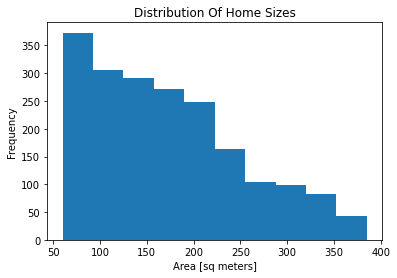

In [54]:
plt.hist(df["area_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution Of Home Sizes");

Boxplot of Area

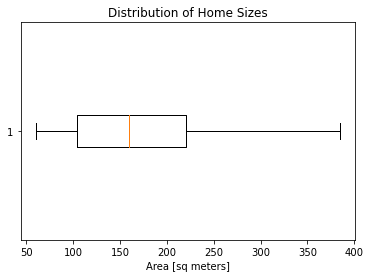

In [55]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes");

Histogram of Price

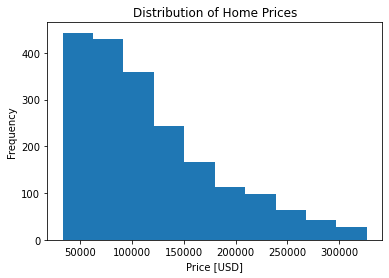

In [56]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

Boxplot of Price

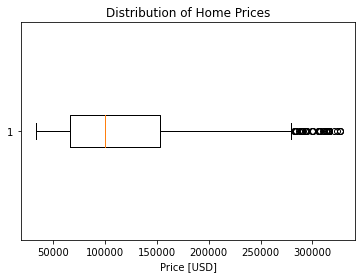

In [57]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price [USD]")
plt.title('Distribution of Home Prices');

In [58]:
# We note that the Histogram above helps us identify where outliers are

Now, we want to answer some research questions about the relationship between House size,Price, and Location

Qusetion1: Which state has the most expensive real estate market?

In [59]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

In [60]:
mean_price_by_state

state
Guanajuato                         136455.662000
Puebla                             133636.258676
Nuevo León                         133416.941075
Querétaro                          132226.542550
Distrito Federal                   129563.668959
Quintana Roo                       125086.812439
Jalisco                            122566.604032
Estado de México                   122316.322921
Campeche                           121734.633333
Guerrero                           117558.418889
Morelos                            116759.420815
Chihuahua                          116632.894400
Sonora                             112368.086923
Yucatán                            111260.068653
Baja California Sur                105745.268824
Aguascalientes                     104619.906667
Chiapas                            102991.667761
San Luis Potosí                    101546.551746
Veracruz de Ignacio de la Llave     99740.415103
Tamaulipas                          93951.846327
Sinaloa       

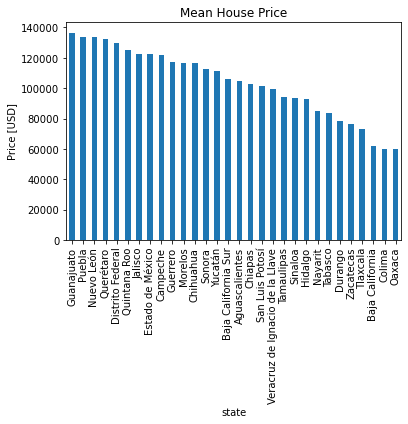

In [61]:
# State mean Bar Chart
mean_price_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="Price [USD]",
    title="Mean House Price"
);

In [62]:
# Price per Square meter
df["price_per_m2"] = df["price_usd"]/df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


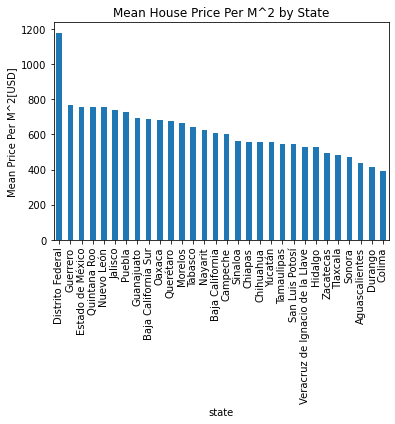

In [63]:
# We want to make the series and the plot with pandas
(
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="state",
        ylabel="Mean Price Per M^2[USD]",
        title="Mean House Price Per M^2 by State"
    )
);

Research Question 2: Is there a relationship between Home Size and Price?

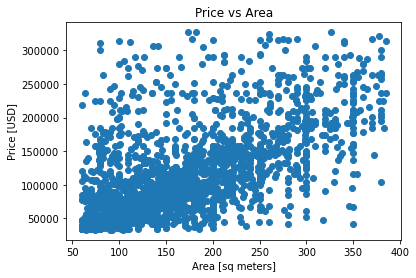

In [64]:
#Price vs Area Scatter Plot
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

In [65]:
# Price vs Area Correlation
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.5911633184040114


Subset to Morelos

In [66]:
df_morelos = df[df["state"] == "Morelos"]
df_morelos.shape
df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623


Morelos, Price vs Area Scatter Plot

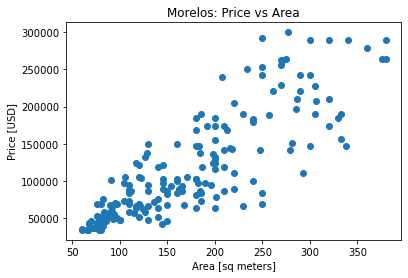

In [67]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs Area");

Morelos, Correlation

In [68]:
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.83851957829558


Mexico City, Price vs Area


In [69]:
# Subset `df` to include only observations from `"Distrito Federal"`
df_mexico_city = df[df["state"] == "Distrito Federal"]
df_mexico_city

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
14,apartment,Distrito Federal,19.390748,-99.158695,127.0,131716.20,1037.135433
16,house,Distrito Federal,19.337652,-99.223327,297.0,264390.77,890.204613
20,apartment,Distrito Federal,19.403334,-99.157755,129.0,131716.20,1021.055814
21,apartment,Distrito Federal,19.428152,-99.106194,68.0,67175.26,987.871471
26,apartment,Distrito Federal,19.430141,-99.172536,97.0,104846.10,1080.887629
...,...,...,...,...,...,...,...
1967,apartment,Distrito Federal,19.441809,-99.156423,80.0,65120.49,814.006125
1970,apartment,Distrito Federal,19.391819,-99.188639,84.0,71653.61,853.019167
1971,apartment,Distrito Federal,19.375412,-99.144234,60.0,105372.96,1756.216000
1973,apartment,Distrito Federal,19.496076,-99.204251,60.0,36260.68,604.344667


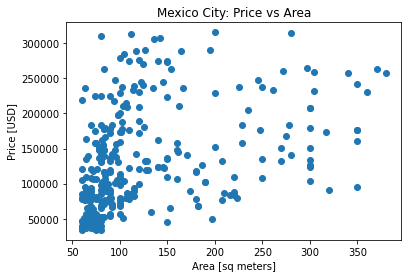

In [70]:
# Create a Scatter plot price vs area
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs Area");

In [71]:
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

0.41204375425224965
